# Decision Tree & Random Forest Regression Exercise

![Namespace Labs](../../../../labs.png)

## [Restaurant Revenue Prediction](https://www.kaggle.com/c/rossmann-store-sales)

In [5]:
# Import pandas 
# Import Matplotlib
# Import numpy 
# Import seaborn
# Set the default seaborn style
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [6]:
# Read in train.csv
train = pd.read_csv('train.csv', low_memory=False)

In [7]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
# Display the head of train.csv


In [9]:
# Import store.csv
store = pd.read_csv('store.csv')

In [10]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
# Display the head of store.csv


In [12]:
# merge store and train
# call the merged dataframe final
final = train.merge(store, on='Store')

In [13]:
final.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [14]:
# Display the head of the merged file


In [15]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [16]:
# Show the info of the merged file


In [17]:
# Fill the null values in CompetitionDistance
final['CompetitionDistance'] = final.CompetitionDistance.fillna(0)

In [18]:
final.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [19]:
# SHow the unique categories in the StateHoliday column
# Display it as a list


In [20]:
# create a variable called cats
# It should contain 'StateHoliday','StoreType', and 'Assortment'
cats = ['StateHoliday','StoreType', 'Assortment']

In [21]:
# Convert StateHoliday to a Categorical Data Type
final['StateHoliday'] = final['StateHoliday'].astype('category')

In [22]:
# Convert StoreType to a Categorical Data Type
final['StoreType'] = final['StoreType'].astype('category')

In [23]:
# Convert Assortment to a Categorical Data Type
final['Assortment'] = final['Assortment'].astype('category')

In [24]:
# Create a dataframe called sales_df from the final dataframe
# It should contain the cats stored as dummy variables
sales_df = pd.get_dummies(final, columns=cats, drop_first=True)

In [25]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,PromoInterval,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,1,1270.0,9.0,...,NaN,NaN,False,False,False,False,True,False,False,False
1,2,5,2015-07-31,6064,625,1,1,1,570.0,11.0,...,2010.0,"Jan,Apr,Jul,Oct",False,False,False,False,False,False,False,False
2,3,5,2015-07-31,8314,821,1,1,1,14130.0,12.0,...,2011.0,"Jan,Apr,Jul,Oct",False,False,False,False,False,False,False,False
3,4,5,2015-07-31,13995,1498,1,1,1,620.0,9.0,...,NaN,NaN,False,False,False,False,True,False,False,True
4,5,5,2015-07-31,4822,559,1,1,1,29910.0,4.0,...,NaN,NaN,False,False,False,False,False,False,False,False


In [26]:
# Check the head of the sales_df


In [27]:
# Create X and y variables
X = sales_df.drop(['Customers','Store','Sales','Date','CompetitionOpenSinceMonth',
                  'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek',
                   'Promo2SinceYear','PromoInterval'],axis=1)
y = sales_df['Sales']

In [28]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [29]:
# Create an instance of DecisionTreeRegressor
dr = DecisionTreeRegressor()

In [30]:
dr.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [31]:
# Fit the tree to X and y


In [32]:
dr.score(X, y)

0.8553079308866232

In [33]:
# Score the model


In [34]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [35]:
# Create an instance of RandomForestRegressor
# Use Random State of 42
# Set the model to use all available CPUs
rf = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)

In [36]:
rf.fit(X,y)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
# Fit the model to X and y


In [38]:
rf.score(X, y)

0.8550003512786586

In [39]:
# Score the Random Forest Model


In [40]:
importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importances']).sort_values(by='Importances', ascending=False)
importances

,Importances
Open,0.536182
CompetitionDistance,0.281745
Promo,0.085290
DayOfWeek,0.033434
StoreType_d,0.016906
StoreType_b,0.015729
StoreType_c,0.012893
Assortment_c,0.012046
SchoolHoliday,0.004284
StateHoliday_a,0.000672


In [41]:
# Create a dataframe containing the feature importances


<Axes: xlabel='Importances', ylabel='None'>

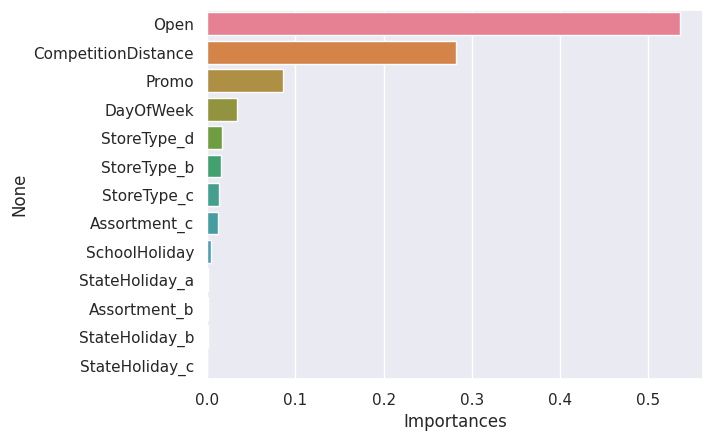

In [42]:
sns.barplot(x=importances.Importances, y=importances.index, hue=importances.index)

In [43]:
# PLot the feature importances


In [44]:
# Import test.csv
test = pd.read_csv('test.csv')

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [46]:
# Show the info of test.csv


In [47]:
test_end = test.shape[0] 
test_end

41088

In [48]:
fill = pd.read_csv('train.csv', low_memory=False)

In [49]:
combo = pd.concat([test, fill])

In [50]:
# Merge test and store
combo = combo.merge(store, on='Store')

In [51]:
combo.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Sales,Customers,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1.0,1,4,2015-09-17,1.0,1,0,0,NaN,NaN,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2.0,3,4,2015-09-17,1.0,1,0,0,NaN,NaN,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3.0,7,4,2015-09-17,1.0,1,0,0,NaN,NaN,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4.0,8,4,2015-09-17,1.0,1,0,0,NaN,NaN,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5.0,9,4,2015-09-17,1.0,1,0,0,NaN,NaN,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [52]:
# Check the head of the merged file


In [53]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058297 entries, 0 to 1058296
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Id                         41088 non-null    float64
 1   Store                      1058297 non-null  int64  
 2   DayOfWeek                  1058297 non-null  int64  
 3   Date                       1058297 non-null  object 
 4   Open                       1058286 non-null  float64
 5   Promo                      1058297 non-null  int64  
 6   StateHoliday               1058297 non-null  object 
 7   SchoolHoliday              1058297 non-null  int64  
 8   Sales                      1017209 non-null  float64
 9   Customers                  1017209 non-null  float64
 10  StoreType                  1058297 non-null  object 
 11  Assortment                 1058297 non-null  object 
 12  CompetitionDistance        1055559 non-null  float64
 13  CompetitionO

In [54]:
# Check of the merged file


In [55]:
combo.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,Sales,Customers,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,1.058297e+06,1.058297e+06,1.058286e+06,1.058297e+06,1.058297e+06,1.017209e+06,1.017209e+06,1.055559e+06,719733.000000,719733.000000,1.058297e+06,533034.000000,533034.000000
mean,20544.500000,5.583315e+02,3.997596e+00,8.310466e-01,3.820704e-01,1.889290e-01,5.773819e+03,6.331459e+02,5.416824e+03,7.216122,2008.688491,5.036715e-01,23.320895,2011.755824
std,11861.228267,3.218456e+02,1.998099e+00,3.747109e-01,4.858939e-01,3.914524e-01,3.849926e+03,4.644117e+02,7.697163e+03,3.209572,6.026086,4.999868e-01,14.100921,1.664251
min,1.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,10272.750000,2.800000e+02,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.727000e+03,4.050000e+02,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,20544.500000,5.580000e+02,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.744000e+03,6.090000e+02,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,30816.250000,8.370000e+02,6.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,7.856000e+03,8.370000e+02,6.880000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,41088.000000,1.115000e+03,7.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.155100e+04,7.388000e+03,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [56]:
# Print a summary of the merged dataframe


In [57]:
# Fill the CompetitionDistance in the merged dataframe
combo['CompetitionDistance'] = combo['CompetitionDistance'].fillna(0)

In [58]:
# Fill Open in the merged dataframe
combo['Open'] = combo['Open'].fillna(0)

In [59]:
# Convert Assortment to categorical data in the merged file
combo['Assortment'] = combo['Assortment'].astype('category')

In [60]:
# Convert StateHoliday to categorical data in the merged file
combo['StateHoliday'] = combo['StateHoliday'].astype('category')

In [61]:
combo.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Sales,Customers,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1.0,1,4,2015-09-17,1.0,1,0,0,NaN,NaN,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2.0,3,4,2015-09-17,1.0,1,0,0,NaN,NaN,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3.0,7,4,2015-09-17,1.0,1,0,0,NaN,NaN,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4.0,8,4,2015-09-17,1.0,1,0,0,NaN,NaN,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5.0,9,4,2015-09-17,1.0,1,0,0,NaN,NaN,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [62]:
# create a dataframe called test_df
# It should contain the merged test dataframe with dummy variables
test_df = pd.get_dummies(combo, columns=cats, drop_first=True).iloc[:test_end, :]

In [63]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,Sales,Customers,CompetitionDistance,...,Promo2SinceYear,PromoInterval,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1.0,1,4,2015-09-17,1.0,1,0,NaN,NaN,1270.0,...,NaN,NaN,False,False,False,False,True,False,False,False
1,2.0,3,4,2015-09-17,1.0,1,0,NaN,NaN,14130.0,...,2011.0,"Jan,Apr,Jul,Oct",False,False,False,False,False,False,False,False
2,3.0,7,4,2015-09-17,1.0,1,0,NaN,NaN,24000.0,...,NaN,NaN,False,False,False,False,False,False,False,True
3,4.0,8,4,2015-09-17,1.0,1,0,NaN,NaN,7520.0,...,NaN,NaN,False,False,False,False,False,False,False,False
4,5.0,9,4,2015-09-17,1.0,1,0,NaN,NaN,2030.0,...,NaN,NaN,False,False,False,False,False,False,False,True


In [64]:
# Create test_X contain the test variables
test_X = test_df[X.columns]

In [65]:
# Print the colums in the training set
test_X.columns

Index(['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [66]:
# Print the columns in the trainig set
X.columns

Index(['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [67]:
# Create a variable called test_predictions
# It should contain the pedictions done on the test set
test_predictions = rf.predict(test_X)


In [68]:
# Print test_predictions
test_predictions

array([ 7181.71364717,  7956.09377046,  9065.97192037, ...,
        5574.86580829, 22050.59701169,  6267.90255069], shape=(41088,))

In [69]:
# Create a dataframe containing the test predictions
# Display its head
predictions = pd.DataFrame(test_predictions, columns=['Sales'])
predictions.head()

,Sales
0,7181.713647
1,7956.093770
2,9065.971920
3,7105.874868
4,6582.894050


In [70]:
# Add the Ids from the test set to the dataframe
# Show the head
predictions['Id'] = test.Id
predictions = predictions[['Id', 'Sales']]
predictions

,Id,Sales
0,1,7181.713647
1,2,7956.093770
2,3,9065.971920
3,4,7105.874868
4,5,6582.894050
...,...,...
41083,41084,3318.893822
41084,41085,8672.072610
41085,41086,5574.865808
41086,41087,22050.597012


In [71]:
predictions.to_csv('submission.csv', index=False)

Save the predictions as csv file called submission.csv. Upload the file to [Kaggle for scoring](https://www.kaggle.com/c/rossmann-store-sales/submissions).

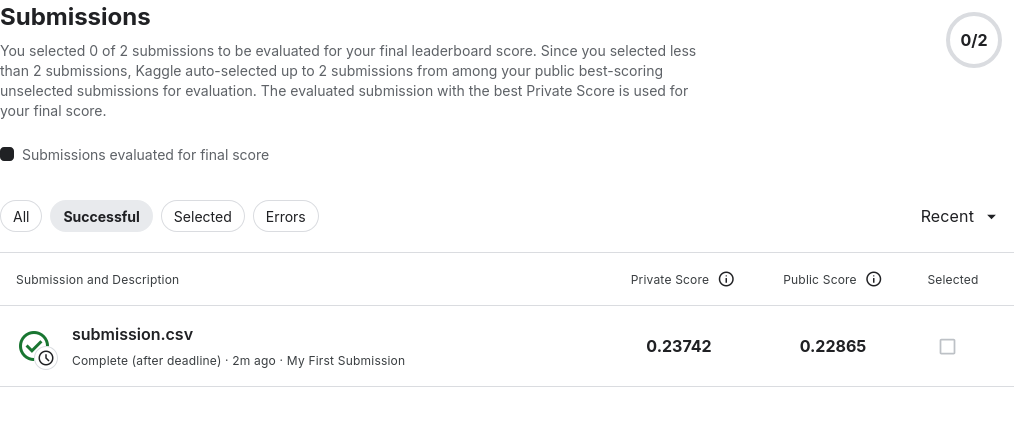

In [72]:
from IPython.display import Image
Image(filename='Evaluation Rossmann Store Sales Kaggle.png') 

The goal here wasn't to build a winning Kaggle model,the goal was to show you how to create a model and  upload it successfully to kaggle!

![submission Screenshot](submit.png)

Happy Coding!